In [1]:
 import tensorflow as tf

In [2]:
#Load the Fashion MNIST dataset

fmnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fmnist.load_data()

# Normalize the pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

In [10]:
# Define the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Setup training parameters
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(X_train, y_train, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(X_test, y_test)


MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4981 - accuracy: 0.8259
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3773 - accuracy: 0.8636
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3342 - accuracy: 0.8777
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3110 - accuracy: 0.8844
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2917 - accuracy: 0.8929

MODEL EVALUATION:
313/313 [==============================] - 1s 2ms/step - loss: 0.3433 - accuracy: 0.8776


### Convolutional Neural Network

In [14]:
# Define the model
model = tf.keras.models.Sequential([
    
    #pooling
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    #Ad the same Layers as before
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

#print the model summary
model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


#Train the model
print(f'\nMODEL TRAINING:')
model.fit(X_train, y_train, epochs = 5)

# Evaluate on the test set 
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(X_test, y_test)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 800)               0         
                                                                 
 dense_14 (Dense)            (None, 128)              

### Visualizing the Convolutions and Pooling

In [16]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

1/1 [==============================] - 0s 24ms/step


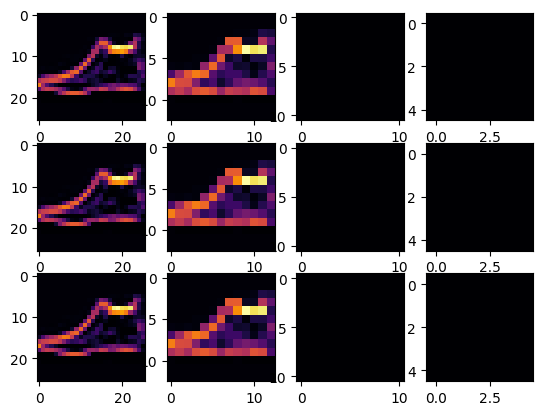

In [24]:
f, axarr = plt.subplots(3,4)

FIRST_IMAGE = 0
SECOND_IMAGE = 23
THIRD_IMAGE = 28
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
    f1 = activation_model.predict(X_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0,x].imshow(f1[0, : , : , CONVOLUTION_NUMBER], cmap = 'inferno')
    axarr[0,x].grid(False)
    
    f2 = activation_model.predict(X_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1,x].imshow(f2[0, : , : , CONVOLUTION_NUMBER], cmap = 'inferno')
    axarr[1,x].grid(False)
    
    f3 = activation_model.predict(X_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2,x].imshow(f3[0, : , : , CONVOLUTION_NUMBER], cmap = 'inferno')
    axarr[2,x].grid(False)
    
    